### Linear Regression in TensorFlow

We will solve the linear equation system:

$$ y = Ax + b$$

We'll use Sepal length (y) and Petal width (x) from the Iris dataset.

We will do the following:
 1. Create the linear regression computational graph output. This means we will accept an input, $x$, and generate the output, $Ax + b$.
 2. We create a loss function, the L2 loss, and use that output with the learning rate to compute the gradients of the model variables, $A$ and $b$ to minimize the loss.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
from sklearn import datasets

# Delete previous tensorboard graph
if os.path.exists('./logs/04_TF_Linear_Regression'):
    !rm /tmp/lin_reg/*.*

In [2]:
# Load the data
# iris.data = [(Sepal Length, Sepal Width, Petal Length, Petal Width)]
iris = datasets.load_iris()
x_vals = np.array([x[3] for x in iris.data])
y_vals = np.array([y[0] for y in iris.data])

In [3]:
print(x_vals.shape,y_vals.shape)

(150,) (150,)


With most TensorFlow algorithms, we will need to declare a batch size for the placeholders and operations in the graph.  Here, we set it to 25.  We can set it to any integer between 1 and the size of the dataset.

In [4]:
# Declare batch size
batch_size = 25

In [5]:
# Initialize placeholders
x_data = tf.placeholder(shape=[None, 1], dtype=tf.float32)
y_target = tf.placeholder(shape=[None, 1], dtype=tf.float32)

# Create variables for linear regression
A = tf.Variable(tf.random_normal(shape=[1,1]))
b = tf.Variable(tf.random_normal(shape=[1,1]))

In [6]:
# Declare model operations
model_output = tf.add(tf.matmul(x_data, A), b)

# Declare loss function (L2 loss)
loss = tf.reduce_mean(tf.square(y_target - model_output))


tf.summary.scalar("loss", loss)
merged = tf.summary.merge_all()

train_writer = tf.summary.FileWriter('/logs/04_TF_Linear_Regression', tf.get_default_graph())

In [7]:
loss.shape

TensorShape([])

We have to tell TensorFlow how to optimize and back propagate the gradients.  We do this with the standard Gradient Descent operator (`tf.train.GradientDescentOptimizer`), with the learning rate argument of $0.05$.

Then we initialize all the model variables.

In [8]:
# Create a graph session
sess = tf.Session()

# Declare optimizer
my_opt = tf.train.GradientDescentOptimizer(0.05)
train_step = my_opt.minimize(loss)

# Initialize variables
init = tf.global_variables_initializer()
sess.run(init)

In [9]:
# Define a function to get the optimal coefficients
def get_optimal_coeff(sess, A, b):
    [slope] = sess.run(A)
    [y_intercept] = sess.run(b)

    # Get best fit line
    best_fit = []
    for i in x_vals:
      best_fit.append(slope*i+y_intercept)
    return best_fit

In [10]:
# Define functions to plot the result
def plot_fitted_line(x_vals, y_vals, best_fit):
    plt.plot(x_vals, y_vals, 'o', label='Data Points')
    plt.plot(x_vals, best_fit, 'r-', label='Best fit line', linewidth=3)
    plt.legend(loc='upper left')
    plt.title('Sepal Length vs Pedal Width')
    plt.xlabel('Pedal Width')
    plt.ylabel('Sepal Length')
    plt.show()

def plot_loss(loss_vec):
    # Plot loss over time
    plt.plot(loss_vec, 'k-')
    plt.title('L2 Loss per Generation')
    plt.xlabel('Generation')
    plt.ylabel('L2 Loss')
    plt.show()

We start our training loop and run the optimizer for 100 iterations.

Step #1 A = [[0.67894995]] b = [[1.7849303]]
Loss = 10.922634


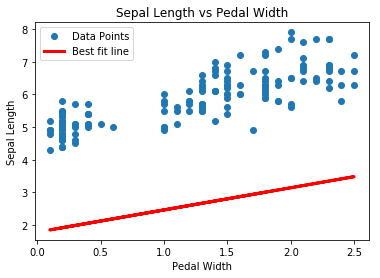

Step #4 A = [[1.6198663]] b = [[2.4768384]]
Loss = 1.3256651


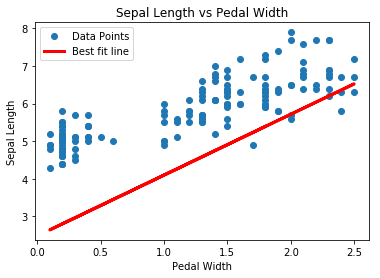

Step #11 A = [[1.9224955]] b = [[3.0914114]]
Loss = 0.9694026


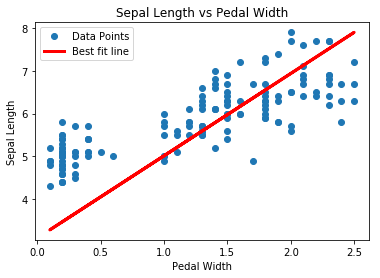

Step #25 A = [[1.7585598]] b = [[3.546723]]
Loss = 0.71880156
Step #50 A = [[1.4226428]] b = [[4.0452414]]
Loss = 0.45678273
Step #75 A = [[1.1948814]] b = [[4.321163]]
Loss = 0.24487524
Step #100 A = [[1.0736916]] b = [[4.510337]]
Loss = 0.16735111


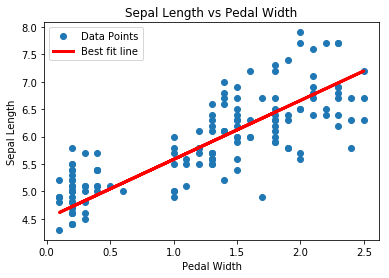

In [11]:
# Training loop
loss_vec = []
counter = 0
for i in range(100):
    rand_index = np.random.choice(len(x_vals), size=batch_size)
    rand_x = np.transpose([x_vals[rand_index]])
    rand_y = np.transpose([y_vals[rand_index]])
    sess.run(train_step, feed_dict={x_data: rand_x, y_target: rand_y})
    summary, temp_loss = sess.run([merged, loss], feed_dict={x_data: rand_x, y_target: rand_y})
    #print(temp_loss.shape)
    loss_vec.append(temp_loss)
    if i in [0, 3, 10, 99]:        
        print('Step #' + str(i+1) + ' A = ' + str(sess.run(A)) + ' b = ' + str(sess.run(b)))
        print('Loss = ' + str(temp_loss))
        best_fit = get_optimal_coeff(sess, A, b)
        plot_fitted_line(x_vals, y_vals, best_fit)  
    elif (i+1)%25==0:
        print('Step #' + str(i+1) + ' A = ' + str(sess.run(A)) + ' b = ' + str(sess.run(b)))
        print('Loss = ' + str(temp_loss))
    counter += 1
    train_writer.add_summary(summary, counter)
sess.close()

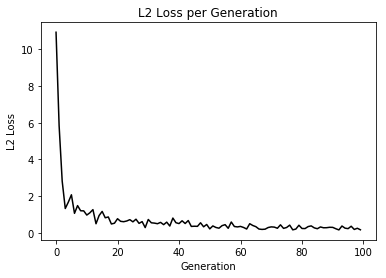

In [12]:
plot_loss(loss_vec)

In [13]:
#!tensorboard --logdir=/logs/04_TF_Linear_Regression